In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dspasign.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,married
0,19,female,27.900,0.0,yes,southwest,16884.92400,no
1,18,male,33.770,1.0,no,southeast,1725.55230,no
2,28,male,33.000,3.0,no,southeast,4449.46200,no
3,33,male,22.705,0.0,no,northwest,21984.47061,yes
4,32,male,NaN,0.0,no,northwest,3866.85520,yes


In [6]:
data_types = df.dtypes # to retrieve each column's data types.
print(data_types)

age           int64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
married      object
dtype: object


In [7]:
# Assuming that  dataset is kept in a variable with the name "df"
df = pd.read_csv('dspasign.csv')  

# Drop the 'married' column
df = df.drop('married', axis=1)
df = df.drop_duplicates()
# Display the modified dataset
df.head()
S

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,NaN,0.0,no,northwest,3866.85520


In [8]:
df.replace('', np.nan, inplace=True)

In [9]:
Missing_values = df.isnull().sum() 
print(Missing_values)

age         0
sex         1
bmi         4
children    4
smoker      2
region      5
charges     0
dtype: int64


In [10]:
age_mean = df['age'].astype('int').mean()
bmi_mean = df['bmi'].astype('float').mean()
child_mean = df['children'].astype('float').mean()
charges_mean = df['charges'].astype('float').mean()
print(age_mean)
print(bmi_mean)
print(child_mean)
print(charges_mean)


38.84848484848485
31.009157894736845
1.1157894736842104
14575.469325757576


In [11]:
df['age'].replace(np.nan, age_mean, inplace=True)
df['bmi'].replace(np.nan, bmi_mean, inplace=True)
df['children'].replace(np.nan, child_mean, inplace=True)
df['charges'].replace(np.nan, charges_mean, inplace=True)

In [12]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print(columns_with_missing_values)

['sex', 'smoker', 'region']


In [13]:
df['sex'].fillna(df['sex'].mode().iloc[0], inplace=True)
df['smoker'].fillna(df['smoker'].mode().iloc[0], inplace=True)
df['region'].fillna(df['region'].mode().iloc[0], inplace=True)

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)


['age', 'bmi', 'children', 'charges']


In [15]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['sex', 'smoker', 'region']


In [16]:

Missing_values = df.isnull().sum() 
print(Missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df = pd.read_csv('cleaned_dsp.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0.0,yes,southwest,16884.92400
1,18,male,33.770000,1.0,no,southeast,1725.55230
2,28,male,33.000000,3.0,no,southeast,4449.46200
3,33,male,22.705000,0.0,no,northwest,21984.47061
4,32,male,31.009158,0.0,no,northwest,3866.85520


In [220]:
df = pd.read_csv('cleaned_dsp.csv')  

# Examine the dataset's shape and structure.
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns)
print("Dataset info:")
df.info()



Dataset shape: (99, 7)
Dataset columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       99 non-null     int64  
 1   sex       99 non-null     object 
 2   bmi       99 non-null     float64
 3   children  99 non-null     float64
 4   smoker    99 non-null     object 
 5   region    99 non-null     object 
 6   charges   99 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.5+ KB


In [215]:
# Statistical summaries for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_stats = df[numeric_cols].describe()
print("\nSummary statistics for numeric columns:")
print(numeric_stats)


Summary statistics for numeric columns:
             age        bmi   children       charges
count  99.000000  99.000000  99.000000     99.000000
mean   38.848485  31.009158   1.115789  14575.469326
std    14.977782   5.582087   1.227767  13527.929284
min    18.000000  17.385000   0.000000   1137.011000
25%    26.500000  26.742500   0.000000   4295.474575
50%    37.000000  31.009158   1.000000  10602.385000
75%    55.000000  35.415000   2.000000  20864.418780
max    64.000000  42.130000   5.000000  51194.559140


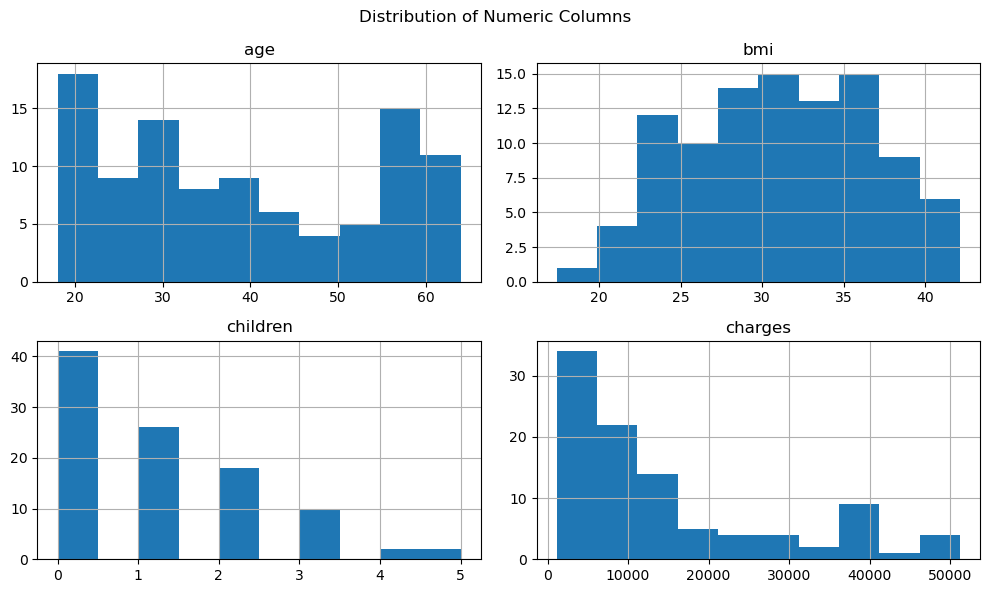

In [216]:
# Numeric column histograms
df[numeric_cols].hist(bins=10, figsize=(10, 6))
plt.suptitle("Distribution of Numeric Columns")
plt.tight_layout()
plt.show()

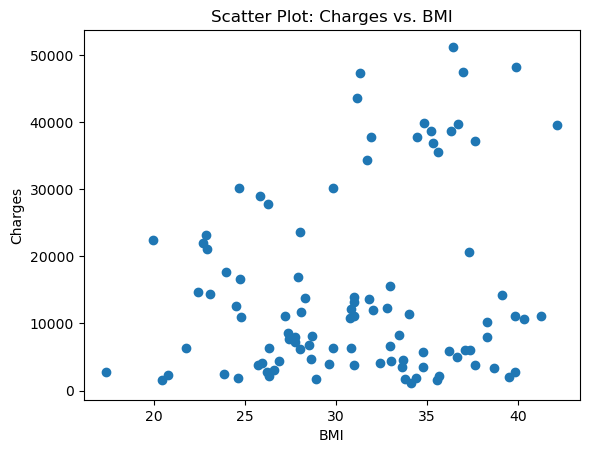

In [217]:
# Charges scatterplot vs BMI
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot: Charges vs. BMI')
plt.show()

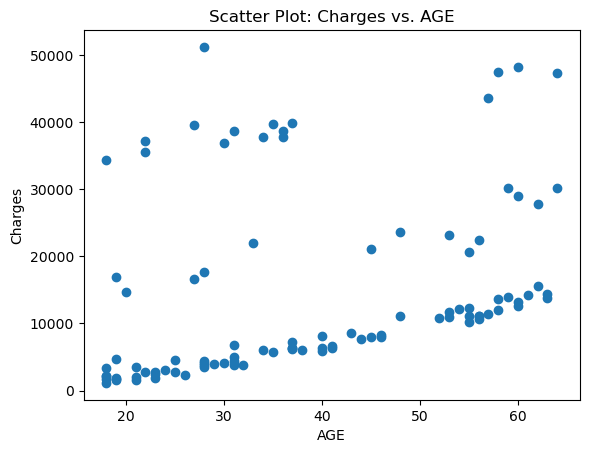

In [221]:
#Scatter plot of charges vs BMI
plt.scatter(df['age'], df['charges'])
plt.xlabel('AGE')
plt.ylabel('Charges')
plt.title('Scatter Plot: Charges vs. AGE')
plt.show()

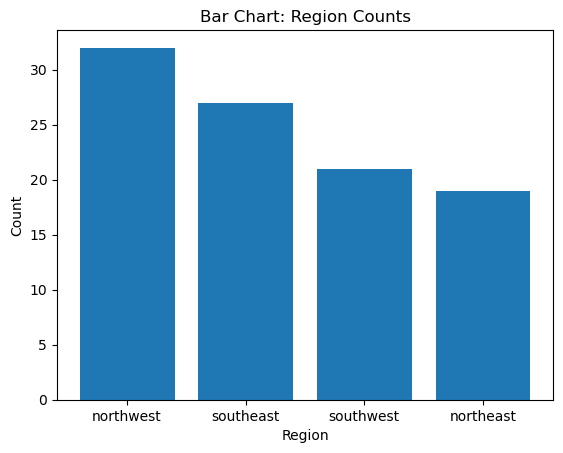

In [218]:
# Region counts in a bar chart
region_counts = df['region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Bar Chart: Region Counts')
plt.show()

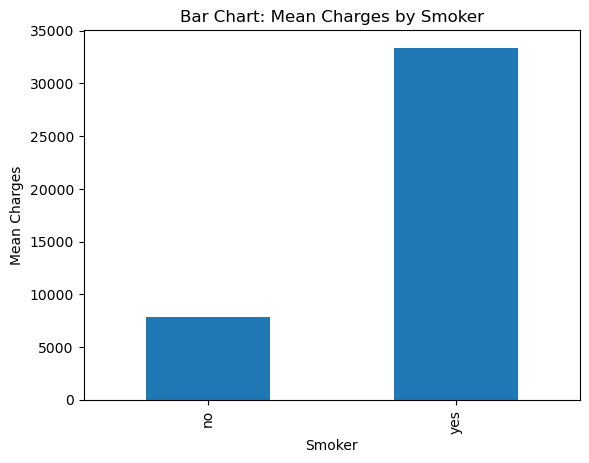

In [219]:
# Research question: Does smoking affect charges?
smoker_charges = df.groupby('smoker')['charges'].mean()
smoker_charges.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')
plt.title('Bar Chart: Mean Charges by Smoker')
plt.show()

In [20]:
# Assume have a DataFrame with the name "df".
X = df.drop('smoker', axis=1).values  # Extract attribute data
y = df['smoker'].values # Remove the target variable.

# The NumPy array containing the feature data will be X.
# The target variable's NumPy array will be represented by y.

In [21]:
# Assume have a DataFrame with the name "df".
feature_cols = ['age', 'bmi', 'children'] # Names of the feature columns
X = df[feature_cols].values # Extract attribute data

# X represents the NumPy array holding the feature data that was chosen.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [24]:
# Create a classifier using a decision tree.
clf = DecisionTreeClassifier()

# Change the classifier according to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

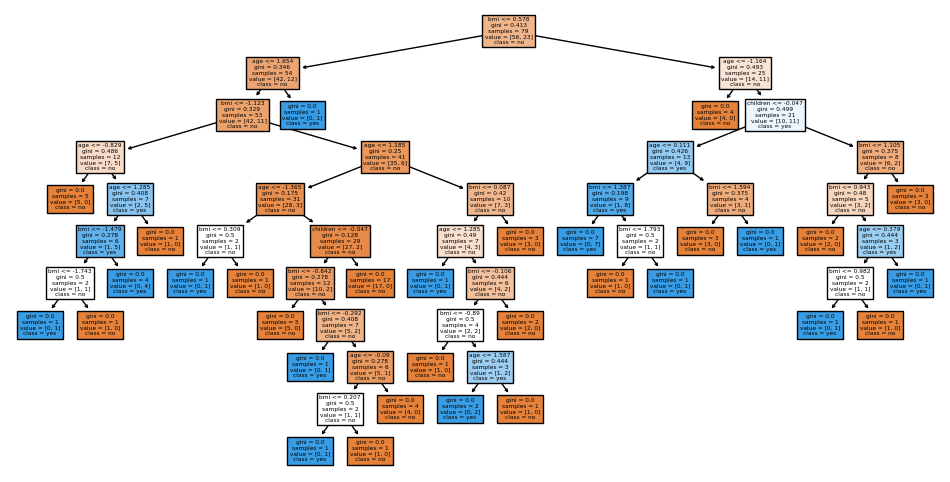

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

# Display the decision tree
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=feature_cols, class_names=clf.classes_, filled=True)
plt.show()

In [29]:
import pandas as pd

# Assuming  DataFrame is loaded and has the name 'df'

# Convert the 'Price' column's data type to numeric
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Determine the correlation matrix.
corr_matrix = df.corr(numeric_only=True)

# Determine the correlation values with regard to "Price"
price_correlations = corr_matrix['charges'].sort_values(ascending=False)

# Remove 'Price' itself from the list of correlations.
price_correlations = price_correlations.drop('charges')

print(price_correlations)


age         0.311443
bmi         0.197075
children   -0.044116
Name: charges, dtype: float64


In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Construct a model for linear regression.
regression_model = LinearRegression()

# Adjust the model for your practise data.
regression_model.fit(X_train, y_train)

# predict based on test results
y_pred = regression_model.predict(X_test)

# Evaluate the model's effectiveness.
accuracy = regression_model.score(X_test, y_test)

chosen_variable = 'age'

# Create training and test sets from the dataset.
X = df[[chosen_variable]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred )
print('R2-score value: ' , r2)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(" Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



R2-score value:  0.2558027292037516
 Mean Squared Error (MSE): 129964742.78335354
Root Mean Squared Error (RMSE): 11400.208014915936


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and labels (y)
X = df[['age', 'bmi', 'children']]
y = df['charges'].apply(lambda x: 1 if x >= 15000 else 0)  # Convert charges to binary labels based on a threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Create and fit the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Create and fit the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Create and fit the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


KNN Accuracy: 0.7
SVM Accuracy: 0.75
Random Forest Accuracy: 0.75


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and labels (y)
X = df[['age']]
y = df['charges'].apply(lambda x: 1 if x >= 15000 else 0)  # Convert charges to binary labels based on a threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9


In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_k = None
best_accuracy = -1

for k in range(1, 51):  # Range from 1 to 50
    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the testing set
    knn_pred = knn.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, knn_pred)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best K value:", best_k)
print("Best Accuracy:", best_accuracy)


Best K value: 6
Best Accuracy: 0.85
